In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import sklearn

# Data Reading

In [2]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [4]:
train.shape

(43400, 12)

In [5]:
test.shape

(18601, 11)

# Data Cleaning


**Identifing missing attributes**

In [ ]:
train_missing_values=train.isnull().sum()
train_missing_values

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
test_missing_values=test.isnull().sum()
test_missing_values

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

<Axes: >

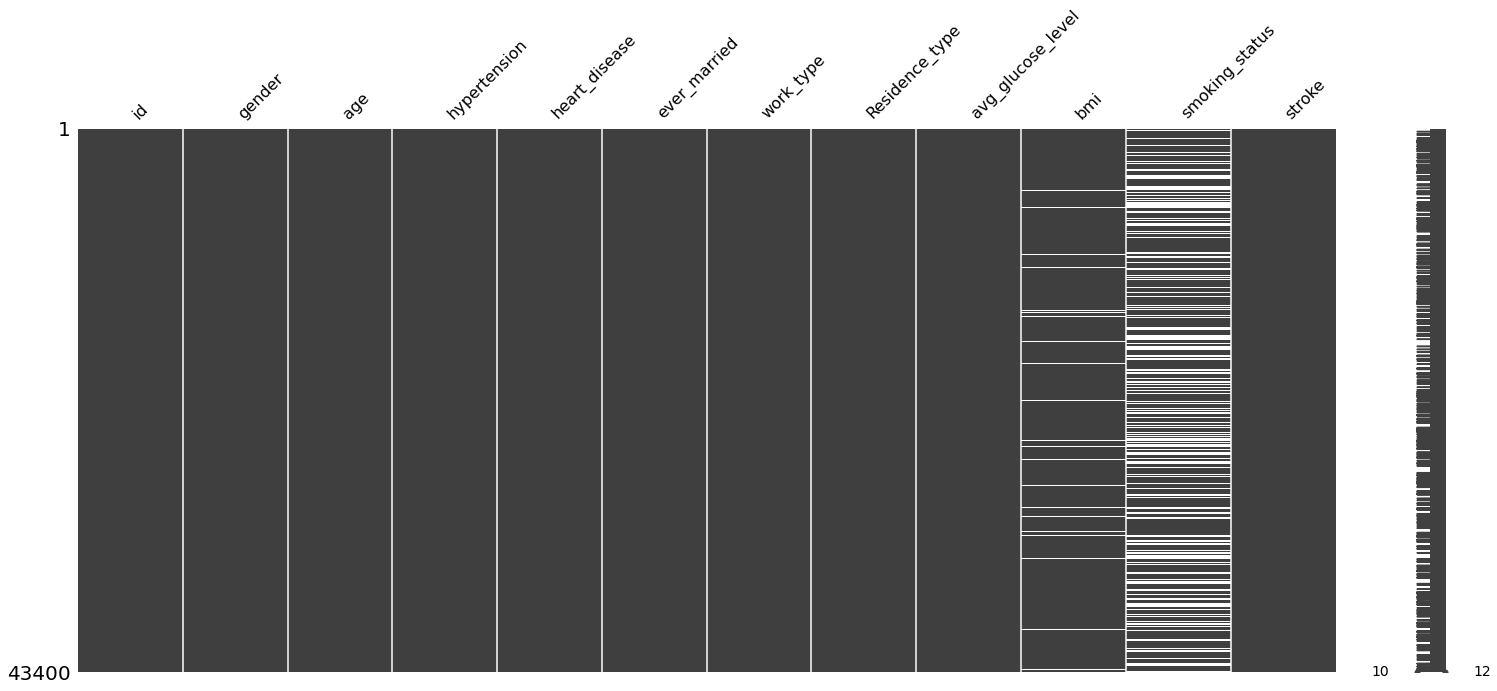

In [6]:
ms.matrix(train)

**Removing missing values**

In [ ]:
train_data=train.dropna(axis=0,how="any")
test_data=test.dropna(axis=0,how="any")
print('train data shape: {}' .format(train_data.shape))
print('test data shape: {}' .format(test_data.shape))

train data shape: (29072, 12)
test data shape: (12423, 11)


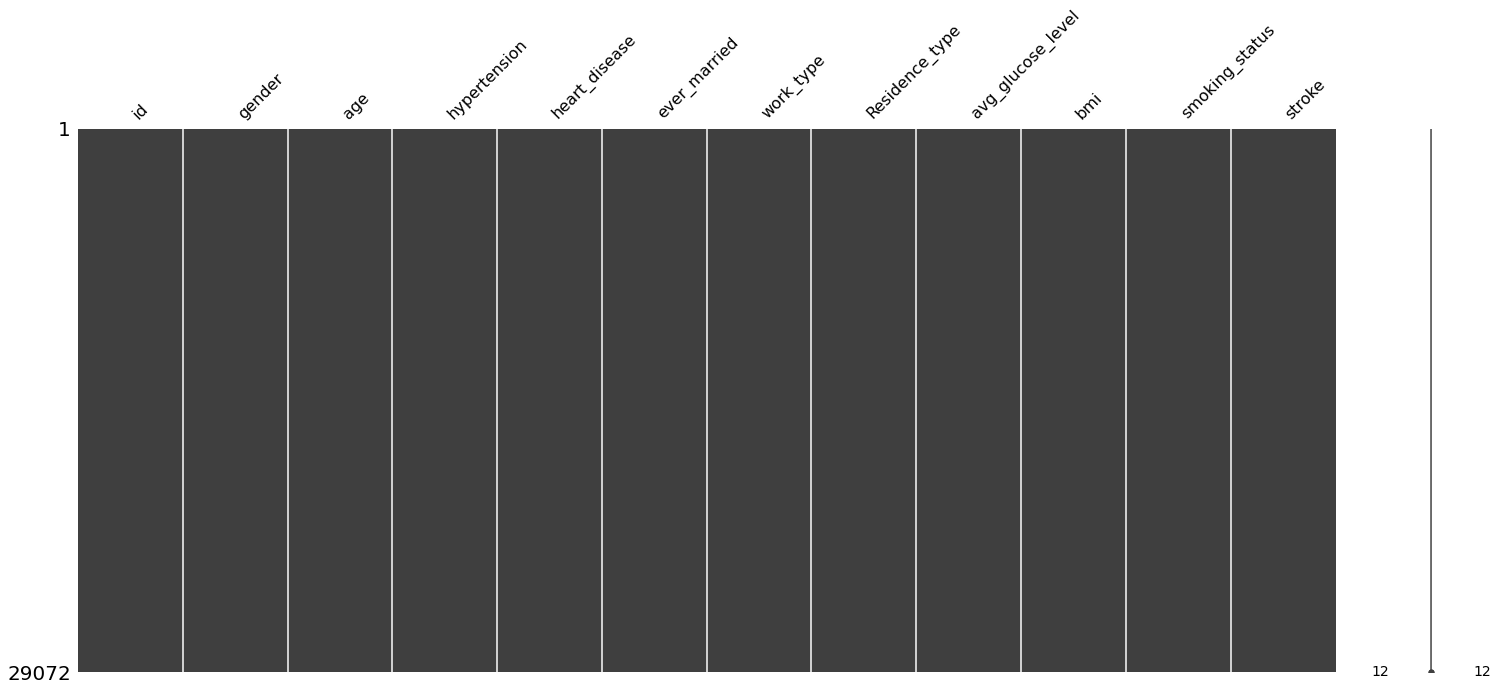

In [ ]:
ms.matrix(train_data)

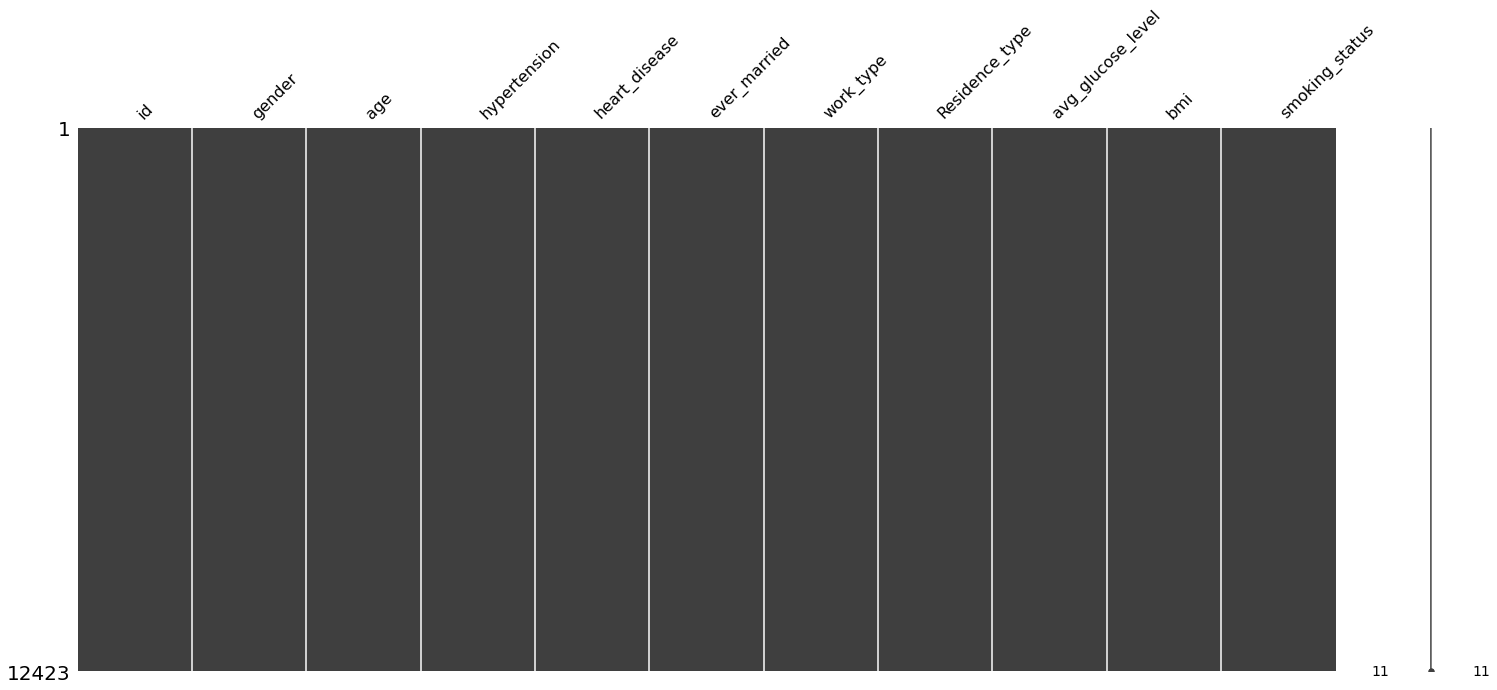

In [ ]:
ms.matrix(test_data)

# Pattern Recognition

In [ ]:
train_data["stroke"].value_counts()

0    28524
1      548
Name: stroke, dtype: int64

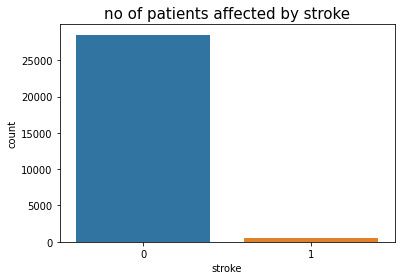

In [ ]:
sns.countplot(x=train_data["stroke"])
plt.title("no of patients affected by stroke", fontsize=15)
plt.show()

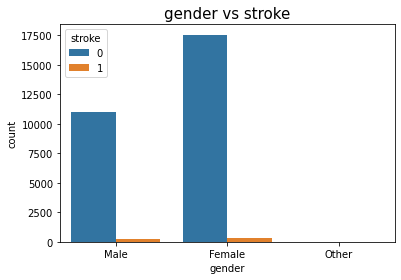

In [ ]:
sns.countplot(x=train_data["gender"], hue=train_data["stroke"])
plt.title("gender vs stroke", fontsize=15)
plt.show()

In [ ]:
train_data.groupby(["gender"])["stroke"].value_counts()


gender  stroke
Female  0         17539
        1           313
Male    0         10978
        1           235
Other   0             7
Name: stroke, dtype: int64

In [ ]:
train_data["smoking_status"].value_counts()

never smoked       15747
formerly smoked     7099
smokes              6226
Name: smoking_status, dtype: int64

In [ ]:
train_data.groupby(["gender"])["smoking_status"].value_counts()


gender  smoking_status 
Female  never smoked       10406
        formerly smoked     3926
        smokes              3520
Male    never smoked        5340
        formerly smoked     3167
        smokes              2706
Other   formerly smoked        6
        never smoked           1
Name: smoking_status, dtype: int64

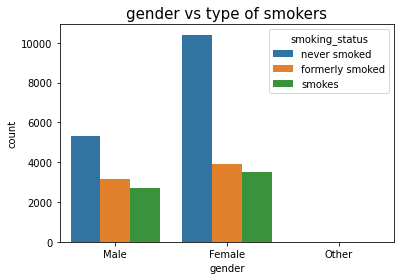

In [ ]:
sns.countplot(x=train_data["gender"], hue=train_data["smoking_status"])
plt.title("gender vs type of smokers", fontsize=15)
plt.show()

### conversion of string type to int type

In [ ]:
str_data=train_data.select_dtypes(include=['object'])
str_dt=test_data.select_dtypes(include=['object'])

In [ ]:
int_data=train_data.select_dtypes(include=['integer', 'float'])
int_dt=test_data.select_dtypes(include=['integer', 'float'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,1,1,2,1,1,30468,58.0,1,0,87.96,39.2,0
3,0,1,2,0,0,56543,70.0,0,0,69.04,35.9,0
6,0,1,2,1,0,52800,52.0,0,0,77.59,17.7,0
7,0,1,3,0,1,41413,75.0,0,1,243.53,27.0,0
8,0,1,2,0,2,15266,32.0,0,0,77.67,32.3,0


In [ ]:
test1=str_dt.apply(label.fit_transform)
Test=test1.join(int_dt)
Test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,0,36306,80.0,0,0,83.84,21.1
1,0,1,3,0,0,61829,74.0,0,1,179.50,26.0
4,0,1,0,0,1,40801,63.0,0,0,83.57,27.6
5,0,1,2,1,1,9348,66.0,1,0,219.98,32.2
7,1,1,0,1,1,60512,46.0,0,0,120.80,32.5


# Modelling & predicting the data

In [ ]:
xtrain=features.drop(["stroke"],axis=1)
xtrain.shape

(29072, 11)

In [ ]:
ytrain=features["stroke"]
ytrain.head()
ytrain.shape

(29072,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [ ]:
x_test.shape

(7268, 11)

In [ ]:
y_test.shape

(7268,)

In [ ]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
3115,1,1,2,1,2,68965,43.0,0,0,72.33,36.2
18511,0,1,2,1,2,27880,34.0,0,0,89.87,29.4
34500,1,1,2,0,1,63964,47.0,0,0,61.50,29.2
7589,1,1,2,1,1,63661,30.0,0,0,95.42,29.8
25155,0,1,2,1,1,39733,22.0,0,0,95.04,27.8


In [ ]:
y_train.head()

3115     0
18511    0
34500    0
7589     0
25155    0
Name: stroke, dtype: int64

## Naive_Bayes

In [ ]:
x_test.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi
26593,0,0,2,0,1,17734,27.0,0,0,100.45,21.3
17695,1,1,2,1,0,45642,52.0,0,0,76.92,47.8
26559,0,1,2,0,1,33711,81.0,0,0,88.13,28.8
22830,1,1,2,0,0,46830,28.0,0,0,99.01,20.5
13757,0,1,2,1,0,71343,82.0,0,0,71.26,31.9


In [ ]:
y_test.head()

26593    0
17695    0
26559    0
22830    0
13757    0
Name: stroke, dtype: int64

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predict=model.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_score=model.score(x_test, y_test)
print("NBtest_score:", test_score)           

NBtest_score: 0.9756466703357182


### Confusion matrix

In [ ]:
nb_conf_mtr=pd.crosstab(y_test, predict)
nb_conf_mtr

col_0,0,1
stroke,,
0,7084,53
1,124,7


### Report for Naive_Bayes 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
nbreport=classification_report(y_test, predict)
print(nbreport)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7137
           1       0.12      0.05      0.07       131

    accuracy                           0.98      7268
   macro avg       0.55      0.52      0.53      7268
weighted avg       0.97      0.98      0.97      7268



## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict=dt_mod.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9627132636213539


### Reports for decision tree

In [ ]:
dectree_report=classification_report(y_test, y_predict)
print(dectree_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7137
           1       0.05      0.06      0.06       131

    accuracy                           0.96      7268
   macro avg       0.52      0.52      0.52      7268
weighted avg       0.97      0.96      0.96      7268



In [ ]:
dt_conf_mtr=pd.crosstab(y_test, y_predict)
dt_conf_mtr

col_0,0,1
stroke,,
0,6989,148
1,123,8



### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0
stroke      
0       7137
1        131
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7137
           1       0.00      0.00      0.00       131

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier()

In [ ]:
mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

In [ ]:
mlp.score(x_test,y_test)

0.9810126582278481

In [ ]:
## Cross validating accuracies

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9757842475511938

In [ ]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9580693693548709

In [ ]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811159333580098

In [ ]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9798779691214212

### Applying PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(xtrain)

NameError: name 'xtrain' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(xtrain, ytrain)

In [ ]:
model_2=GaussianNB()
model_2.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
test_score=model_2.score(x_test, y_test)
print("NBtest_score:", test_score)  

NBtest_score: 0.9756466703357182


In [ ]:
dt_mod=DecisionTreeClassifier()
dt_mod.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
ts_dt_score=dt_mod.score(x_test, y_test)
print("Decision tree test score:", ts_dt_score)

Decision tree test score: 0.9606494221243809


In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
print(pd.crosstab(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

col_0      0  1
stroke         
0       7132  2
1        134  0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7134
           1       0.00      0.00      0.00       134

    accuracy                           0.98      7268
   macro avg       0.49      0.50      0.50      7268
weighted avg       0.96      0.98      0.97      7268



In [ ]:
rfc.score(x_test,y_test)

0.9812878370941112

In [ ]:

mlp=MLPClassifier()

mlp.fit(x_train,y_train)

y_pred_mlp = mlp.predict(x_test)

mlp.score(x_test,y_test)

0.9815630159603742

In [ ]:
cross_val_score(model_2,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

In [ ]:
cross_val_score(dt_mod,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9592044775737909

In [ ]:
cross_val_score(rfc,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9811503212534707

In [ ]:
cross_val_score(mlp,xtrain,ytrain,cv = 20, scoring='accuracy').mean()

0.9547403702059297